In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


-----------------------------------------------------------------------------------------------------------------------------

# Descriptive Statistics and Visualizations

## A boxplot for the median value of owner-occupied homes:

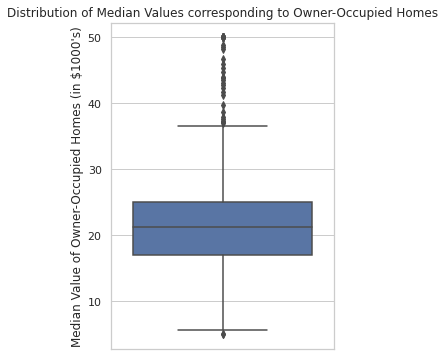

In [104]:
sns.set(style="whitegrid")
plt.figure(figsize=(4,6))
medbx=sns.boxplot(y="MEDV", data=boston_df)
plt.title("Distribution of Median Values corresponding to Owner-Occupied Homes")
plt.ylabel("Median Value of Owner-Occupied Homes (in $1000's)")
plt.show()

**Explanation:** The boxplot indicates the quartiles corresponding to "median value of owner-occupied homes" along with the maximum and minimum values. It is observed that the median of this variable is around 21000$.

-----------------------------------------------------------------------------------------------------------------------------

## A histogram for the Charles river variable:

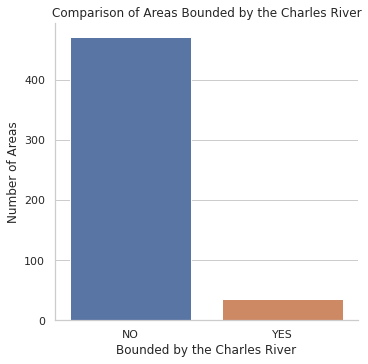

In [112]:
chas_hs=sns.catplot(x='CHAS',kind="count",data=boston_df)
chas_hs.set(xticklabels=["NO","YES"])
plt.title("Comparison of Areas Bounded by the Charles River")
plt.ylabel("Number of Areas")
plt.xlabel("Bounded by the Charles River")
plt.show()

**Explanation:** There are less than 40 tracts bounded by the Charles river.

-----------------------------------------------------------------------------------------------------------------------------

## A boxplot for the MEDV variable vs the AGE variable:

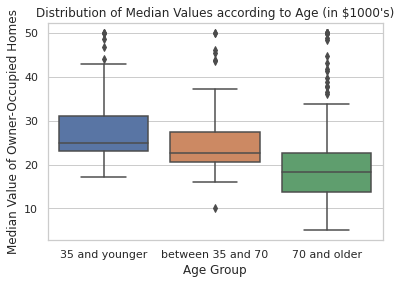

In [97]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 and older'
med_age= sns.boxplot(x="AGE_GROUP", y="MEDV",
                 data=boston_df,order=["35 and younger","between 35 and 70","70 and older"])
plt.title("Distribution of Median Values according to Age (in $1000's)")
plt.ylabel("Median Value of Owner-Occupied Homes")
plt.xlabel("Age Group")
plt.show()

**Explanation:** The quartiles of each age group are illustrated in the boxplot. It is concluded that the median value of owner-occupied homes is likely to decrease as their age grows.

-----------------------------------------------------------------------------------------------------------------------------

## A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town:

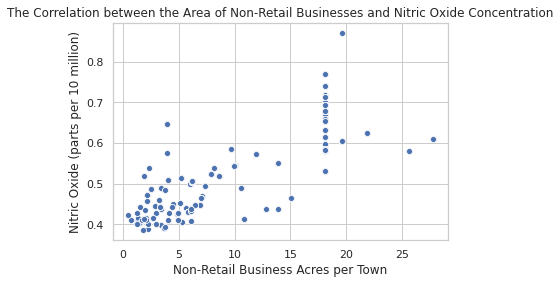

In [115]:
nox_indus=sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
plt.title("The Correlation between the Area of Non-Retail Businesses and Nitric Oxide Concentration")
plt.xlabel("Non-Retail Business Acres per Town")
plt.ylabel("Nitric Oxide (parts per 10 million)")
plt.show()

**Explanation:** There is a clear correlation, according to which there is a growth in the concentration of nitric oxide when non-retail business area increases.

-----------------------------------------------------------------------------------------------------------------------------

## A  histogram for the pupil to teacher ratio variable:

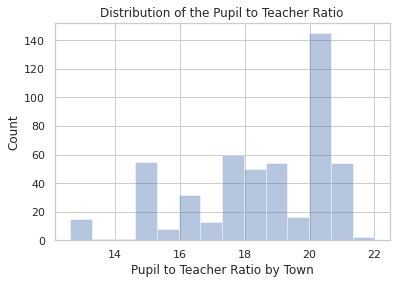

In [91]:
pt_hist = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.title("Distribution of the Pupil to Teacher Ratio")
plt.ylabel("Count")
plt.xlabel("Pupil to Teacher Ratio by Town")
plt.show()

-----------------------------------------------------------------------------------------------------------------------------

# Hypothesis Testing and Regression

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis Testing:**

H0= There is no significant difference between the median value of houses bounded by the Charles river and those not bounded.

H1= There is a significant difference between the median value of houses bounded by the Charles river and those not bounded.

α = 0.05

In [94]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than alpha value 0.05, it can not be assumed that variances are equal.

In [95]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'],equal_var=False )

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough evidence that there is a statistical difference in median value of houses based on being bounded by the Charles River.

-----------------------------------------------------------------------------------------------------------------------------

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

We have previously categorized the AGE variable into three groups as follows:

- 35 years and younger
- between 35 and 70 years
- 70 years and older

For Hypothesis Testing:

H0= The means of all these groups are equal.

H1=  At least one of the means differs

In [98]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is far less than alpha value 0.05, we reject the null hypothesis as there is enough evidence that there is a statistical difference in Median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).

-----------------------------------------------------------------------------------------------------------------------------

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis Testing:**

H0= Nitric Oxide concentration is not correlated with proportion of non-retail business acres per town.

H1= Nitric Oxide concentration is correlated with proportion of non-retail business acres per town.

In [99]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value is far less than alpha value 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

-----------------------------------------------------------------------------------------------------------------------------

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypothesis Testing:**

H0= Weighted distance to the five Boston employment centers is not correlated with the median value of owner-occupied homes.

H1= Weighted distance to the five Boston employment centers is correlated with the median value of owner-occupied homes.

In [102]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           1.21e-08
Time:                        23:26:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is far less than alpha value 0.05, we reject the null hypothesis and there is evidence of correlation between weighted distance to the five Boston employment centers and  the median value of owner-occupied homes. R-squared is 0.062, so the correlation coefficient is roughly 0.25 and as such, there is a moderate correlation between the variables in question.

Moreover, the coefficient of weighted distance is around 1.1. It indicates that for an additional weighted distance, we can expect the median value of owner-occupied homes to increase by an average of 1100$.